In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("3) Sentiment dataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
text_cols = df.select_dtypes(include=["object"]).columns.tolist()
text_col = text_cols[0]
df = df.dropna(subset=[text_col]).reset_index(drop=True)
corpus = df[text_col].astype(str).tolist()


In [3]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = vectorizer.fit_transform(corpus)


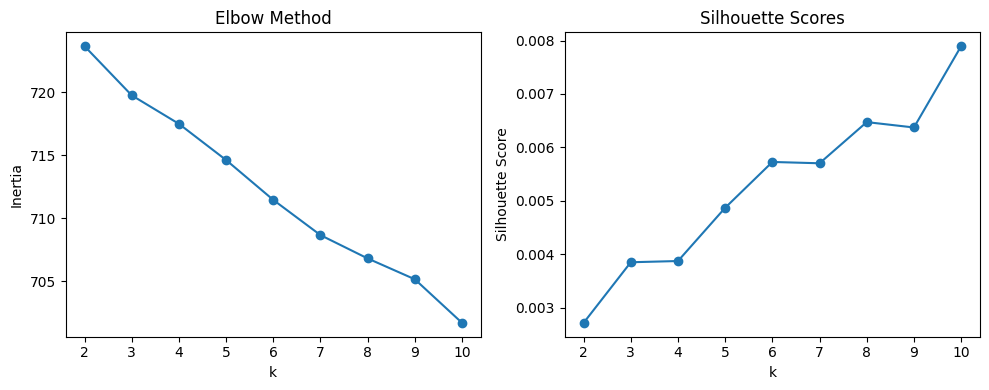

In [4]:
inertia = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_tfidf)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_tfidf, labels))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K, inertia, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")

plt.tight_layout()
plt.show()


In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)
df["Cluster"] = clusters


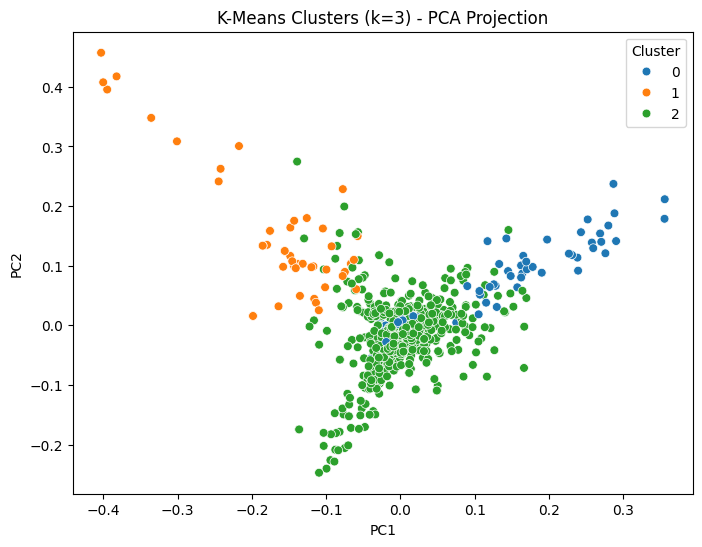

In [6]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df["Cluster"],
    palette="tab10",
    s=40
)
plt.title(f"K-Means Clusters (k={k}) - PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [7]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    count = (df["Cluster"] == i).sum()
    print(f"Cluster {i} - size: {count} - top terms: {top_terms}")


Cluster 0 - size: 62 - top terms: ['new', 'day', 'trying', 'learning', 'recipe', 'exploring', 'enthusiasm', 'project', 'blog', 'productive']
Cluster 1 - size: 47 - top terms: ['life', 'embracing', 'finding', 'acceptance', 'midst', 'challenges', 'imperfections', 'dance', 'chaos', 'reflecting']
Cluster 2 - size: 623 - top terms: ['feeling', 'heart', 'night', 'joy', 'like', 'laughter', 'dreams', 'world', 'beauty', 'lost']


In [8]:
cluster_examples = df.groupby("Cluster").head(3)[[text_col, "Cluster"]]
print(cluster_examples.to_string(index=False))


                                                     Text  Cluster
      Enjoying a beautiful day at the park!                      0
      Traffic was terrible this morning.                         2
       Just finished an amazing workout! 💪                       2
      Excited about the upcoming weekend getaway!                2
      Trying out a new recipe for dinner tonight.                0
      Feeling grateful for the little things in life.            1
      The new movie release is a must-watch!                     0
 Finding acceptance in the midst of life's challenges.           1
 Finding calmness in the midst of a busy day.                    1
